<a href="https://colab.research.google.com/github/uervitonsantos/Atividade_Analise_Bayeseana_Com_RSTAN/blob/main/trabalho_de_estatistivca_bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade de analise inferencial Bayseana com RStan aplicado em um conjunto de dados de confiabilidade de motores

Estimating Generalized Linear Models for Count Data with rstanarm: https://mc-stan.org/rstanarm/articles/count.html

Poisson regression in Stan: https://rpubs.com/kaz_yos/stan-pois1

Negative Binomial Distribution: https://rpubs.com/mpfoley73/458738

Estatística Bayesiana com R e Stan. prof. José Eduardo Storopoli: https://www.youtube.com/watch?v=m_kJwaL2KHQ&list=PLpTXaEnTpmwNwBwwwLTDmCLekoUPtc0cP&index=10

Aula Inferência Bayesiana com prof. Gustavo Ferreira: https://www.youtube.com/watch?v=YKZ1euMRsbs&list=PL5nbzsxqG2FPrVmqbLafXqOrE3djThquN

https://study.sagepub.com/sites/default/files/chapter16.pdf

Beginners Exercise: Bayesian computation with Stan and Farmer Jöns: https://www.sumsar.net/files/posts/2017-01-15-bayesian-computation-with-stan-and-farmer-jons/stan_exercise.html

Stan: https://mc-stan.org/

Plotting Bayesian models: http://mc-stan.org/bayesplot/

How to Use the rstanarm Package: https://mc-stan.org/rstanarm/articles/rstanarm.html

Count Outcome Models with Stan: https://rpubs.com/kaz_yos/stan_count2

Simulate and fit negative binomial GLMs in Stan: http://rstudio-pubs-static.s3.amazonaws.com/34099_2e35c3966ef548c2918d5b6c2146bfd1.html

In [ ]:
!pip install rpy2==3.5.4

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
# install e chamada dos pacotes necessarios para o analise dos dados
if(!require(rstanarm))
install.packages("rstanarm")
if(!require(ggpubr))
install.packages("ggpubr")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%R
library(ggplot2)
library(dplyr)
library(bayesplot)
library(rstanarm)
library(ggpubr)
theme_set(bayesplot::theme_default())

In [6]:
%%R
df <- read.csv("/content/drive/MyDrive/Colab Notebooks/DateSet/Motor_Bomba.csv", header = TRUE, sep = ";", dec = ",")

In [7]:
%%R
str(df)

'data.frame':	363 obs. of  23 variables:
 $ ano                           : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ dia                           : int  2 3 4 5 6 7 8 9 10 11 ...
 $ falha                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ severidade_mc                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ temp_estator_fase_U           : int  38 38 38 38 38 38 38 38 38 38 ...
 $ temp._estator_fase_v          : int  40 40 40 40 40 40 40 40 40 40 ...
 $ temp_estator_fase_wa          : int  37 37 37 37 37 37 37 36 36 36 ...
 $ temp_estator_fase_wb          : int  39 39 39 39 39 39 39 39 39 39 ...
 $ vibracoo_bomba_la             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ vazao_bomba                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ corrente                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pressao_desc.                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pressao_suc                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ posicao_fcv                   : int  0 0 0 0 0 0 0 0

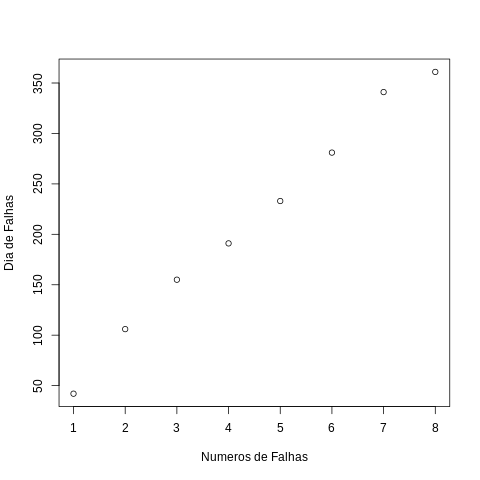

In [8]:
%%R
plot(df$dia[df$falha > "0"], ylab="Dia de Falhas", xlab="Numeros de Falhas")
lines(density(df$falha),
 lwd = 2,
 col = "red")

In [9]:
%%R
sd(df$falha) %>% log

[1] -1.917244


In [10]:
%%R
sd(df$dia) %>% log

[1] 4.653325


In [11]:
%%R
sd(df$severidade_mc) %>% log

[1] 2.205596


In [44]:
%%R
# Estimate Bayesian version with stan_glm
stan_glm1 <- stan_glm(falha ~ dia + severidade_mc,
                      data = df,  
                      family = poisson, 
                    #   prior = normal(c(0, 0, 0), c(0.1, 5, 5)),
                    #   prior_intercept = normal(0, 2.5)
                    )
summary(stan_glm1)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.268813 seconds (Warm-up)
Chain 1:                0.200043 seconds (Sampling)
Chain 1:                0.4

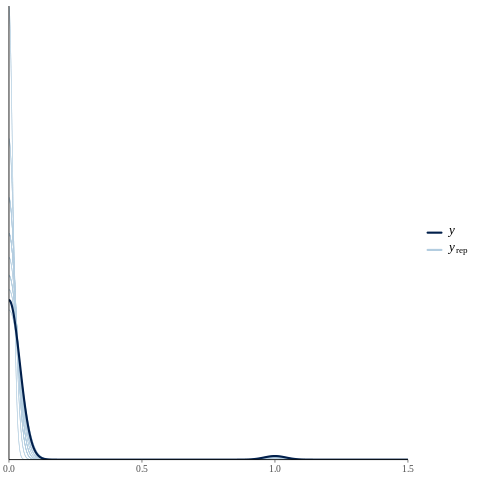

In [46]:
%%R
pp_check(stan_glm1, ndraws = 50) + xlim(0, 1.5)

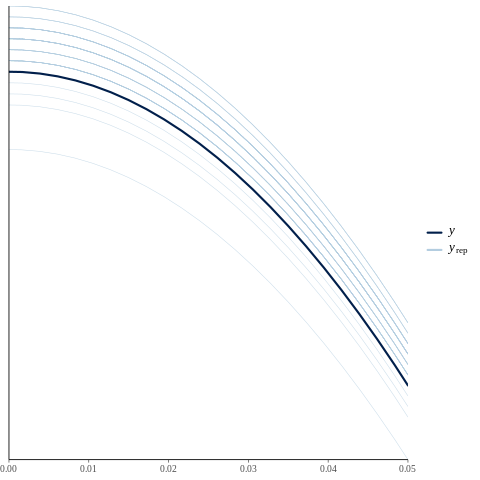

In [47]:
%%R
pp_check(stan_glm1, ndraws = 50) + xlim(0, 0.05)

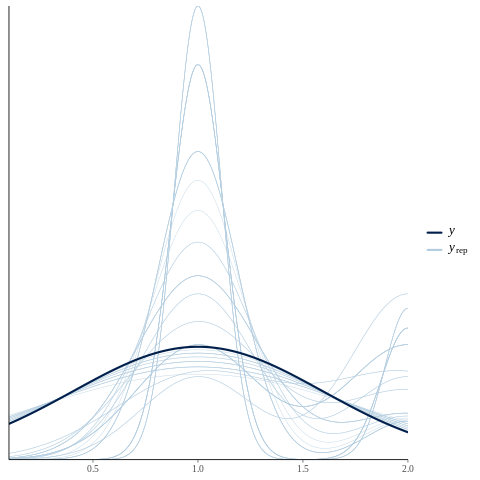

In [48]:
%%R
pp_check(stan_glm1, ndraws = 50) + xlim(0.1, 2)

In [49]:
%%R
stan_glm2 <- update(stan_glm1, family = neg_binomial_2)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.643723 seconds (Warm-up)
Chain 1:                0.606145 seconds (Sampling)
Chain 1:                1.2

In [50]:
%%R
test1 <- pp_check(stan_glm1,  ndraws = 50) + xlim(0.1, 2)
test2 <- pp_check(stan_glm2, ndraws = 50) + xlim(0.1, 2)

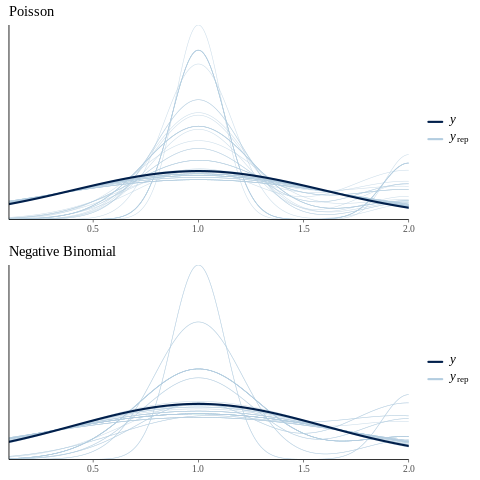

In [51]:
%%R
t1 <- test1 + ggtitle("Poisson")
t2 <- test2 + ggtitle("Negative Binomial")

ggarrange(t1, t2, ncol = 1, nrow = 2)

In [28]:
%%R
library(loo)

In [52]:
%%R
loo_poisson <- loo::loo(stan_glm1)
loo_negbinomial <- loo::loo(stan_glm2)

In [53]:
%%R
loo::loo_compare(loo_poisson, loo_negbinomial)

          elpd_diff se_diff
stan_glm1  0.0       0.0   
stan_glm2 -1.2       0.7   
